# Simple Linear Regression Example

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/skim0119/venv/GenP3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Linear Data
- Some random noise was added.
- Split the data into training and testing dataset. (ratio = 0.2)

/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
/Users/skim0119/venv/GenP3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


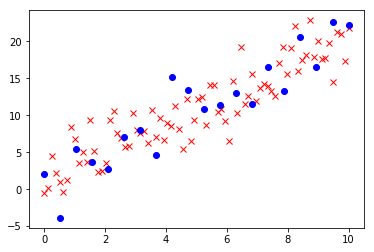

In [2]:
# Prepare Data
def dataset(ratio=0.2, num=100):
    y = lambda x: x * 2 + 1
    distribution = 2.5
    X_train = np.linspace(0,10,num=num*(1-ratio),endpoint=True)
    X_test = np.linspace(0,10,num=num*ratio,endpoint=True)
    Y_train = np.random.normal(y(X_train), distribution)
    Y_test = np.random.normal(y(X_test), distribution)
    return (X_train, Y_train), (X_test, Y_test)

(X_train, Y_train), (X_test, Y_test) = dataset()

# Visualize Data
plt.plot(X_train, Y_train, 'rx')
plt.plot(X_test, Y_test, 'bo')

## Model
- Sequential : Simple stacking layer type of structure
    - Dense: Fully-Connected layer
- First layer must have input dimension.
    - 'input_dim=1'
    - It is possible to add another layer that only takes inputs.

### Compile
- Define loss function and training method
    - SGD: Stochastic gradient descent optimizer
    - mse: mean squared error

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# Model
model = Sequential()
model.add(Dense(1, input_dim=1,
                kernel_initializer='zeros'
               ))

# Compile
model.compile('SGD', 'mse')

## Training

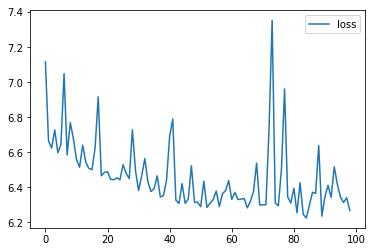

In [4]:
# Fitting
history = model.fit(X_train, Y_train, epochs = 100, verbose=0)

# Plotting loss
plt.plot(history.history['loss'][1:], label='loss')
plt.legend(loc='best')
plt.show()

## Result

In [5]:
print('loss = %.02f' % model.evaluate(X_test, Y_test, verbose=0))

loss = 7.91


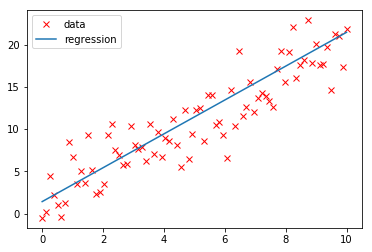

In [6]:
plt.plot(X_train, Y_train, 'rx', label='data')
plt.plot(X_test, model.predict(X_test), label='regression')
plt.legend(loc='best')